In [1]:
import pandas as pd

In [2]:
terroris_dataset=pd.read_csv("globalterrorismdb_0718dist.csv",encoding="ISO-8859-1", low_memory=False)
terroris_dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
terroris_dataset.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [4]:
terroris_dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
terroris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
usecols = [1, 5, 8, 10, 11, 12, 13, 14, 25, 26, 27, 29, 35, 58, 69, 71, 82, 98, 100, 101, 103, 104, 106]
renamecols = {
    'latitude': 'lat',
    'longitude': 'lon',
    'iyear': u'year',
    'country_txt': u'country',
    'region_txt': u'region',
    'provstate': u'state',
    'attacktype1_txt': u'attacktype',
    'targtype1_txt': u'targettype',
    'weaptype1_txt': u'weapontype',
    'nperps': u'nter',
    'nkill': u'nkilled',
    'nkillter': u'nkilledter',
    'nwound': u'nwounded',
    'nwoundte': u'nwoundedter',
    'propextent_txt': u'propertyextent'
}

In [7]:
terroris_data= pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1',usecols=usecols)
terroris_data.rename(columns=renamecols, inplace=True)
terroris_data = terroris_data.apply(lambda x: x.encode('utf-8').strip() if isinstance(x, str) else x)

In [8]:
terroris_data.shape

(181691, 23)

In [9]:
terroris_data.head()

,year,extended,country,region,state,city,lat,lon,multiple,success,...,gname,nter,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundedter,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,0.0,1,...,MANO-D,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0,NaN
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0.0,1,...,23rd of September Communist League,7.0,NaN,Unknown,0.0,NaN,0.0,NaN,0,NaN
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0.0,1,...,Unknown,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0,NaN
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0.0,1,...,Unknown,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,1,NaN
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0.0,1,...,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,1,NaN


In [10]:
terroris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            181691 non-null  int64  
 1   extended        181691 non-null  int64  
 2   country         181691 non-null  object 
 3   region          181691 non-null  object 
 4   state           181270 non-null  object 
 5   city            181256 non-null  object 
 6   lat             177135 non-null  float64
 7   lon             177134 non-null  float64
 8   multiple        181690 non-null  float64
 9   success         181691 non-null  int64  
 10  suicide         181691 non-null  int64  
 11  attacktype      181691 non-null  object 
 12  targettype      181691 non-null  object 
 13  gname           181691 non-null  object 
 14  nter            110576 non-null  float64
 15  claimed         115571 non-null  float64
 16  weapontype      181691 non-null  object 
 17  nkilled   

In [11]:
terroris_data= terroris_data[pd.notnull(terroris_data.lat)]
terroris_data =terroris_data[pd.notnull(terroris_data.lon)]
print("Unknown values in the coordinates are removed succcessfully")


Unknown values in the coordinates are removed succcessfully


In [12]:
# Unknowns in numeric columns
exclude_cols = ['year', 'lat', 'lon']
float_cols = [c for c in terroris_data.select_dtypes(include=[float]).columns.tolist() if c not in exclude_cols]

In [13]:
terroris_data[float_cols] =terroris_data[float_cols].fillna(0).astype(int)
terroris_data[float_cols] = terroris_data[float_cols].mask(terroris_data[float_cols] < 0, 0)

In [14]:
# Unknowns in string columns
str_cols = terroris_data.select_dtypes(exclude=[float]).columns.tolist()
terroris_data[str_cols] = terroris_data[str_cols].fillna('Unknown')
# Many fields are dots which mean unknown value
terroris_data[str_cols] = terroris_data[str_cols].replace(r'^\.*$', 'Unknown', regex=True)

In [15]:
# Limit Long strings
terroris_data['weapontype'] = terroris_data['weapontype'].replace(u'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')
terroris_data['propertyextent'] = terroris_data['propertyextent'].replace(u'Minor (likely < $1 million)', u'Minor (< $1 million)')
terroris_data['propertyextent'] = terroris_data['propertyextent'].replace(u'Major (likely > $1 million but < $1 billion)', u'Major (< $1 billion)')
terroris_data['propertyextent'] = terroris_data['propertyextent'].replace(u'Catastrophic (likely > $1 billion)', u'Catastrophic (> $1 billion)')

In [16]:
# Number of duplicates values
terroris_data.duplicated().sum()

22037

In [17]:
# Removal of duplicates values
terroris_data.drop_duplicates(keep=False,inplace=True)

In [18]:
terroris_data.isnull().sum()

year              0
extended          0
country           0
region            0
state             0
city              0
lat               0
lon               0
multiple          0
success           0
suicide           0
attacktype        0
targettype        0
gname             0
nter              0
claimed           0
weapontype        0
nkilled           0
nkilledter        0
nwounded          0
nwoundedter       0
property          0
propertyextent    0
dtype: int64

In [19]:
terroris_data

,year,extended,country,region,state,city,lat,lon,multiple,success,...,gname,nter,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundedter,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,0,1,...,MANO-D,0,0,Unknown,1,0,0,0,0,Unknown
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0,1,...,23rd of September Communist League,7,0,Unknown,0,0,0,0,0,Unknown
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,1,...,Unknown,0,0,Unknown,1,0,0,0,0,Unknown
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0,1,...,Unknown,0,0,Explosives,0,0,0,0,1,Unknown
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,1,...,Unknown,0,0,Incendiary,0,0,0,0,1,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,0,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,0,1,...,Al-Shabaab,0,1,Firearms,1,0,2,0,-9,Unknown
181687,2017,0,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,0,1,...,Muslim extremists,0,0,Explosives,2,0,7,0,1,Unknown
181688,2017,0,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,0,1,...,Bangsamoro Islamic Freedom Movement (BIFM),0,0,Incendiary,0,0,0,0,1,Unknown
181689,2017,0,India,South Asia,Manipur,Imphal,24.798346,93.940430,0,0,...,Unknown,0,0,Explosives,0,0,0,0,-9,Unknown


In [20]:
terroris_data.columns

Index(['year', 'extended', 'country', 'region', 'state', 'city', 'lat', 'lon',
       'multiple', 'success', 'suicide', 'attacktype', 'targettype', 'gname',
       'nter', 'claimed', 'weapontype', 'nkilled', 'nkilledter', 'nwounded',
       'nwoundedter', 'property', 'propertyextent'],
      dtype='object')

In [21]:
terroris_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145751 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            145751 non-null  int64  
 1   extended        145751 non-null  int64  
 2   country         145751 non-null  object 
 3   region          145751 non-null  object 
 4   state           145751 non-null  object 
 5   city            145751 non-null  object 
 6   lat             145751 non-null  float64
 7   lon             145751 non-null  float64
 8   multiple        145751 non-null  int32  
 9   success         145751 non-null  int64  
 10  suicide         145751 non-null  int64  
 11  attacktype      145751 non-null  object 
 12  targettype      145751 non-null  object 
 13  gname           145751 non-null  object 
 14  nter            145751 non-null  int32  
 15  claimed         145751 non-null  int32  
 16  weapontype      145751 non-null  object 
 17  nkilled        

In [22]:
terroris_data.nunique()

year                 47
extended              2
country             204
region               12
state              2822
city              34796
lat               47862
lon               47578
multiple              2
success               2
suicide               2
attacktype            9
targettype           22
gname              3397
nter                107
claimed               2
weapontype           12
nkilled             201
nkilledter           96
nwounded            237
nwoundedter          44
property              3
propertyextent        4
dtype: int64

In [23]:
terroris_data['year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

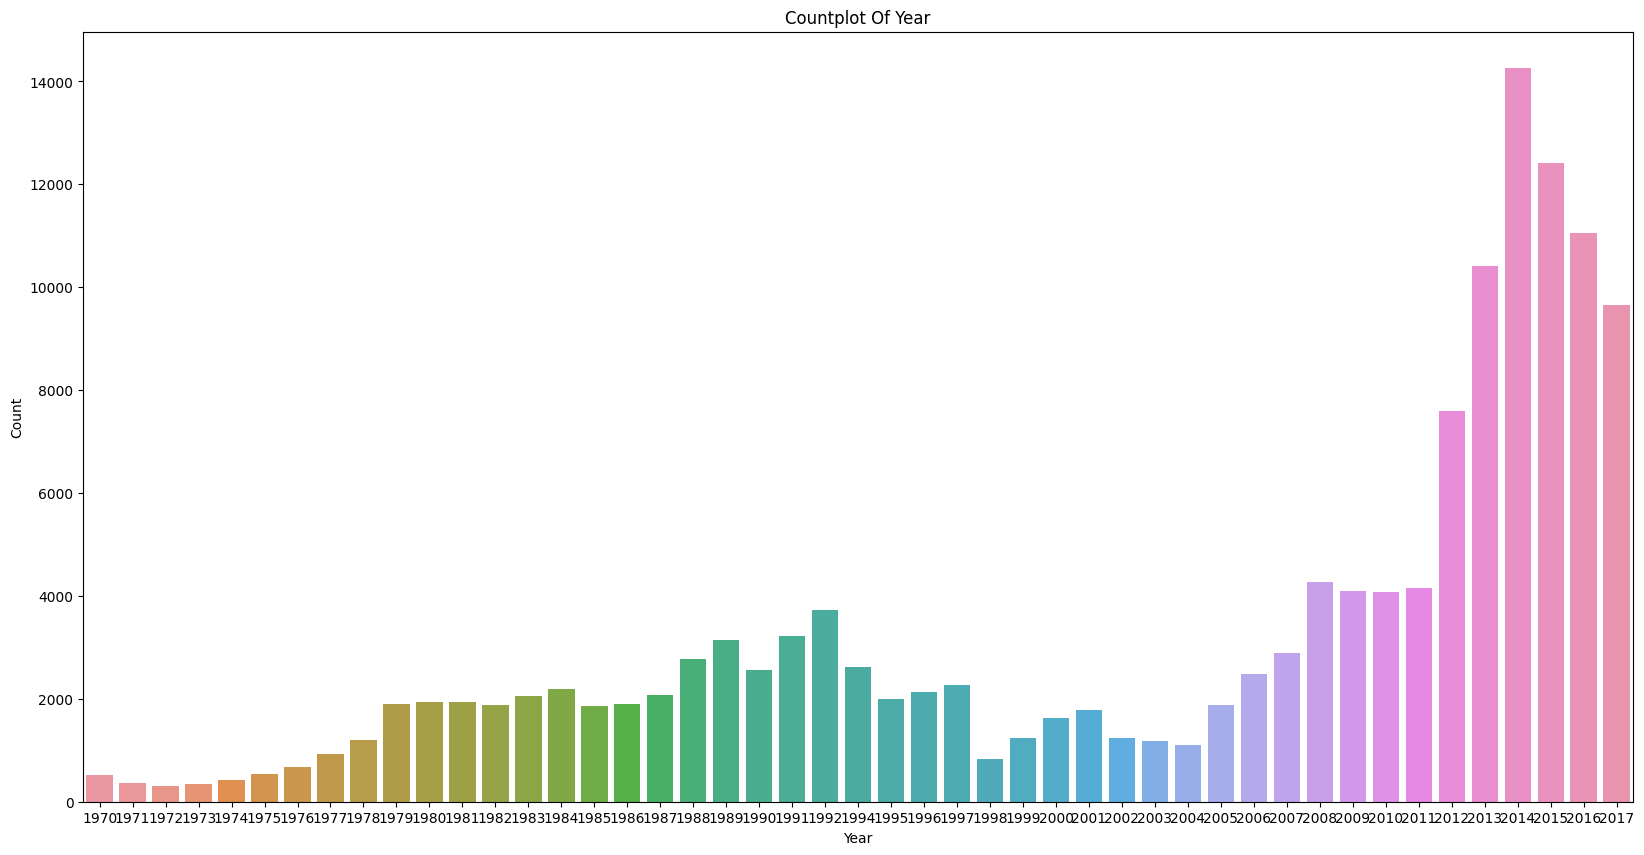

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(x=terroris_data['year'], data=terroris_data)
plt.title("Countplot Of Year")
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


In [26]:
terroris_data['city'].value_counts()

city
Unknown            6089
Baghdad            3967
Karachi            1491
Mosul              1433
Mogadishu          1211
                   ... 
Tathong               1
Essai                 1
Ban Ton Phai          1
Chandanigahapur       1
Kubentog              1
Name: count, Length: 34796, dtype: int64

In [27]:
terroris_data.describe()


,year,extended,lat,lon,multiple,success,suicide,nter,claimed,nkilled,nkilledter,nwounded,nwoundedter,property
count,145751.000000,145751.000000,145751.000000,1.457510e+05,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000
mean,2003.696846,0.050717,23.737317,-5.594836e+02,0.087306,0.885668,0.043828,3.487187,0.118277,2.596339,0.386097,3.336485,0.080638,-0.595577
std,12.881297,0.219419,17.816167,2.257515e+05,0.282285,0.318215,0.204713,95.413777,0.322937,12.242903,3.708930,38.221146,1.304178,3.144615
min,1970.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,1992.000000,0.000000,11.500433,9.109324e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,0.000000,31.326015,4.378420e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,0.000000,34.621521,6.988188e+01,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000
max,2017.000000,1.000000,74.633553,1.793667e+02,1.000000,1.000000,1.000000,25000.000000,1.000000,1570.000000,500.000000,8191.000000,200.000000,1.000000


In [28]:
terroris_data.iloc[0]

year                                     1970
extended                                    0
country                    Dominican Republic
region            Central America & Caribbean
state                                 Unknown
city                            Santo Domingo
lat                                 18.456792
lon                                -69.951164
multiple                                    0
success                                     1
suicide                                     0
attacktype                      Assassination
targettype        Private Citizens & Property
gname                                  MANO-D
nter                                        0
claimed                                     0
weapontype                            Unknown
nkilled                                     1
nkilledter                                  0
nwounded                                    0
nwoundedter                                 0
property                          

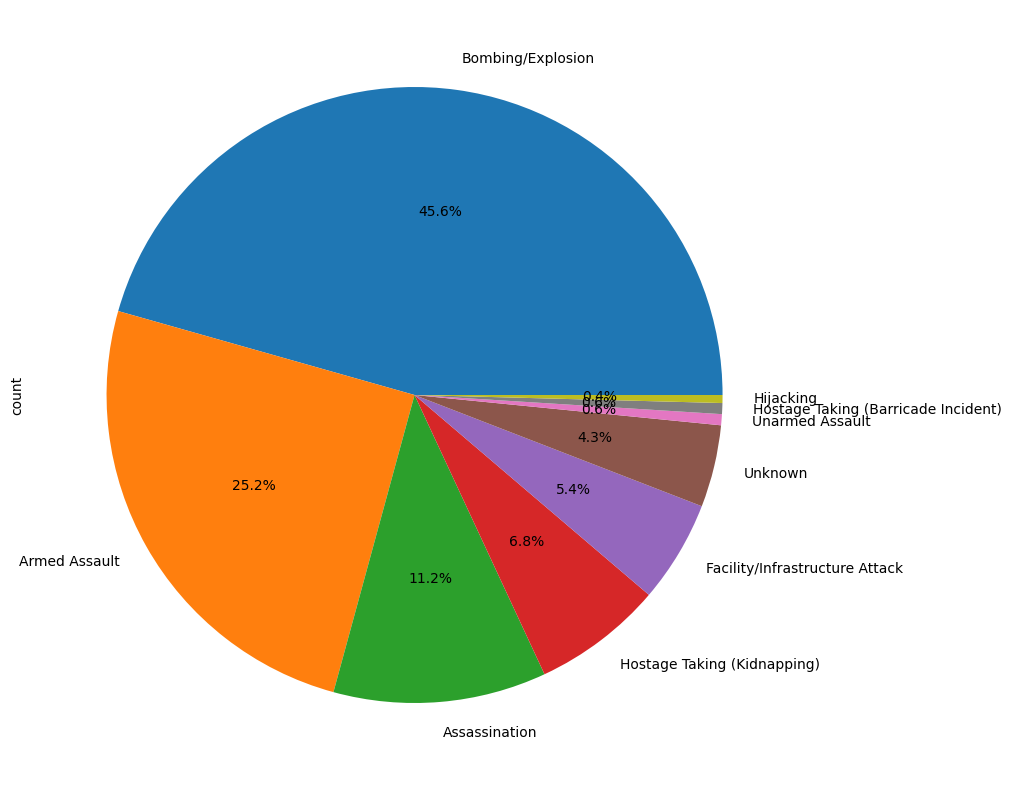

In [30]:
plt.figure(figsize=(10,10))
terroris_data['attacktype'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

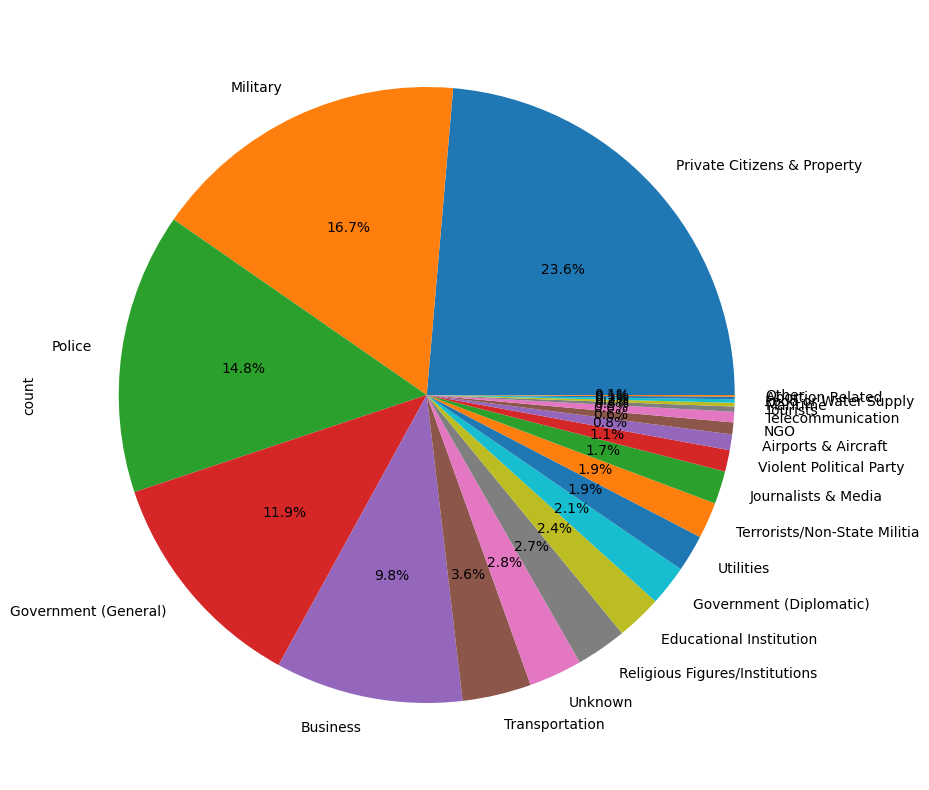

In [31]:
plt.figure(figsize=(10,10))
terroris_data['targettype'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

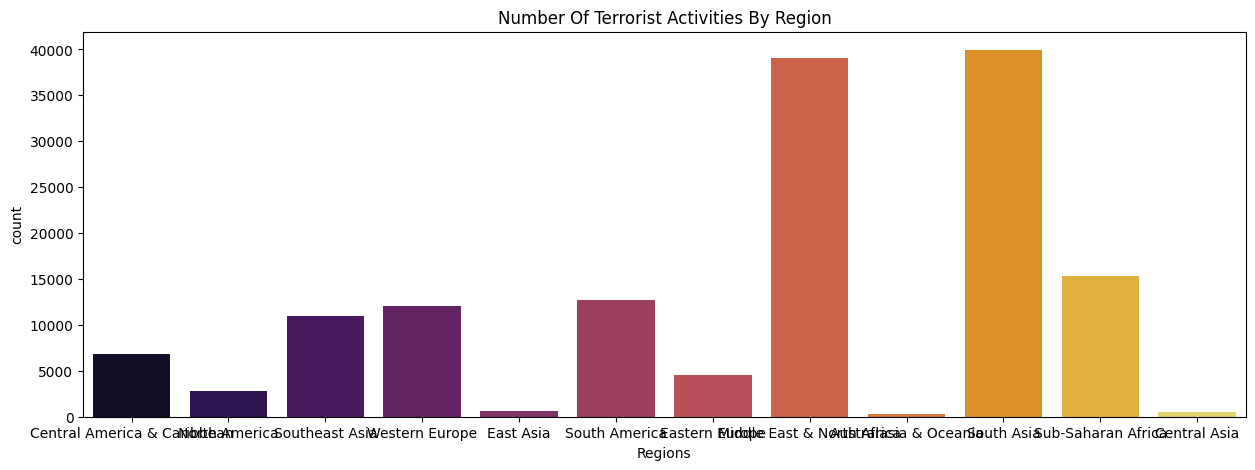

In [35]:
# Number of Terrorist Activities by Region
plt.subplots(figsize=(15,5))
sns.countplot(x=terroris_data['region'],data=terroris_data, palette='inferno')
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

Text(0.5, 1.0, 'Number of Terrorist Activities Regionwise')

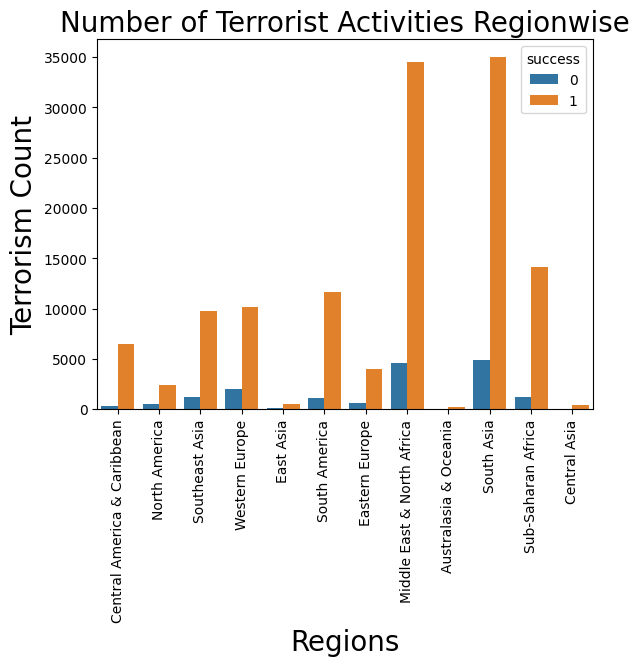

In [36]:
sns.countplot(x= terroris_data["region"], hue="success", data=terroris_data)
plt.xlabel("Regions", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Terrorism Count", fontsize=20)
plt.title("Number of Terrorist Activities Regionwise", fontsize=20)

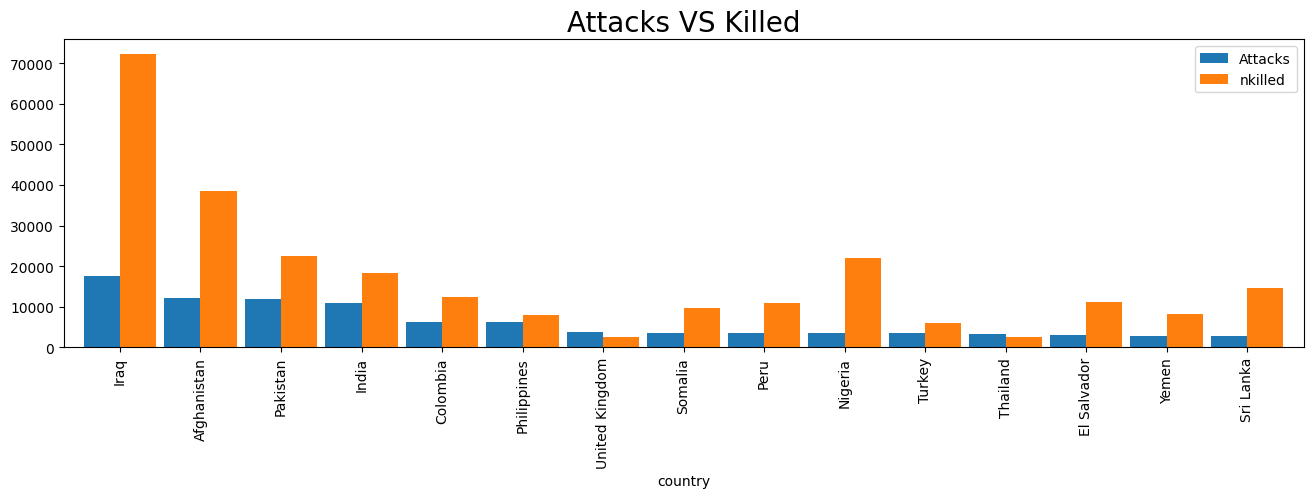

In [37]:
# Attacks VS Killed
count_terror = terroris_data['country'].value_counts()[:15].to_frame()
count_terror.columns=['Attacks']
count_kill=terroris_data.groupby ('country')['nkilled'].sum().to_frame()
count_terror.merge(count_kill,left_index = True,right_index =True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
plt.title("Attacks VS Killed", fontsize=20)
fig.set_size_inches(16,4)
plt.show()